# AML - EXPERIMENT 04
     HEMAA CHANDHAN
      20BTRCD039
Feature Selection

Based on correlation matrix

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv("C:/Users/HEMAACHANDHAN/Downloads/train.csv")
df_test = pd.read_csv("C:/Users/HEMAACHANDHAN/Downloads/test.csv")

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_train.shape

(1460, 81)

In [10]:
df_train.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
#let's deal with null-numerical data first
# we have three attributes
# using fillna method to fill '0' value (as there are less null values)

# distance value can't be just any mean value, so just fill with 0
df_train['LotFrontage'].fillna(0,inplace=True)

# year value will be invalid if written by any statistical measures
df_train['GarageYrBlt'].fillna(0,inplace=True)

# area can't be any random value
df_train['MasVnrArea'].fillna(0,inplace=True)

In [12]:
# categorical values
# using mode to fill null values as `electrical` attribute has categories
e_mode = df_train['Electrical'].mode()[0]
df_train['Electrical'].fillna(e_mode, inplace=True)

In [13]:
# quality check categories are'nt meant to be taken as mode and replace with null values
# use 'unknown' tern to replace null values

df_train['Alley'].fillna('Unknown', inplace=True)
df_train['BsmtQual'].fillna("Unknown", inplace=True)
df_train['BsmtCond'].fillna("Unknown", inplace=True)
df_train['BsmtExposure'].fillna("Unknown", inplace=True)
df_train['BsmtFinType1'].fillna("Unknown", inplace=True)
df_train['BsmtFinType2'].fillna("Unknown", inplace=True)
df_train['FireplaceQu'].fillna("Unknown", inplace=True)
df_train['GarageType'].fillna("Unknown", inplace=True)
df_train['GarageCond'].fillna("Unknown", inplace=True)
df_train['GarageFinish'].fillna("Unknown", inplace=True)
df_train['GarageQual'].fillna("Unknown", inplace=True)
df_train['PoolQC'].fillna("Unknown", inplace=True)
df_train['Fence'].fillna("Unknown", inplace=True)
df_train['MiscFeature'].fillna("Unknown", inplace=True)
df_train['MasVnrType'].fillna("Unknown", inplace=True)

In [14]:
df_train.isnull().sum().sum()


0

In [15]:
df_train.duplicated().sum()


0

In [16]:
df_train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Encoding
Performing data encoding, to include all necessary attributes in house price prediction.

For example, based on previous users, property's quality and condition can be considered and apply the price tag accordingly.

NOTE: code of Data encoding part is reffered from https://www.kaggle.com/code/waichiuwong1/house-prices-advanced-regression-techniques

In [17]:
# Calculate age of property at time of sale
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearRemodAdd']

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170']
df_train['Age_Group'] = pd.cut(df_train['HouseAge'], bins=bins, labels=labels, include_lowest=True)
df_train['Age_Group'] = df_train['Age_Group'].astype('category')
#weights = {'TenC': 2, 'Elev': 1.5, 'Gar2': 1.1, 'Othr': 0.6, 'Shed': 0.3, 'Unknown': 0.0}
weights = {'TenC': 2000, 'Elev': 3000, 'Gar2': 9283, 'Othr': 3300, 'Shed': 800, 'Unknown': 0.0}
df_train ['MiscFeature'] = df_train['MiscFeature'].map(weights)
weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.6, 'Po': 0.3, 'Unknown': 0.0}
df_train ['BsmtQual'] = df_train['BsmtQual'].map(weights)
df_train ['BsmtCond'] = df_train['BsmtCond'].map(weights)
weights = {'Gd': 1.5, 'Av': 1.2, 'Mn': 0.9, 'No': 0.6, 'Unknown': 0.0}
df_train ['BsmtExposure'] = df_train ['BsmtExposure'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.2, 'TA': 1, 'Fa': 0.8, 'Po': 0.5}
df_train ['HeatingQC'] = df_train ['HeatingQC'].map(weights)

weights = {'Reg': 1.0, 'IR1': 0.8, 'IR2': 0.6, 'IR3': 0.4}
df_train ['LotShape'] = df_train ['LotShape'].map(weights)

weights = {10: 2, 9: 1.8, 8: 1.65, 7: 1.45, 6: 1.15, 5: 0.85, 4: 0.6, 3: 0.4, 2: 0.2, 1: 0.1}
df_train ['OverallQual'] =df_train['OverallQual'].map(weights)
df_train ['OverallCond'] = df_train ['OverallCond'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.6, 'Po': 0.3}
df_train ['ExterCond'] = df_train ['ExterCond'].map(weights)
df_train ['ExterQual'] =df_train ['ExterQual'].map(weights)

weights = {'GLQ': 1.5, 'ALQ': 1.2, 'BLQ': 0.9, 'Rec': 0.6, 'LwQ': 0.3, 'Unf': 0.2, 'Unknown': 0.0}
df_train ['BsmtFinType1'] = df_train['BsmtFinType1'].map(weights)
df_train ['BsmtFinType2'] = df_train ['BsmtFinType1'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.2, 'TA': 1.0, 'Fa': 0.6, 'Po': 0.3}
df_train ['KitchenQual'] = df_train ['KitchenQual'].map(weights)

weights = {'Fin': 1.5, 'RFn': 1, 'Unf': 0.6, 'Unknown': 0}
df_train['GarageFinish'] = df_train ['GarageFinish'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.6, 'Po': 0.3, 'Unknown': 0.0}
df_train ['GarageQual'] = df_train ['GarageQual'].map(weights)
df_train ['GarageCond'] = df_train ['GarageCond'].map(weights)

weights = {'Ex': 1.5, 'Gd': 1.3, 'TA': 1, 'Fa': 0.7,'Unknown': 0.0}
df_train ['PoolQC'] = df_train ['PoolQC'].map(weights)

Though we did data encoding of all categorized attributes, there might be some problems related to data distribution.

So, let's use Label Encoding to normalize the whole data labels

In [18]:
from sklearn.preprocessing import LabelEncoder
normal_data = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'PavedDrive', 'GarageType', 'Fence', 'SaleType', 'SaleCondition', 'Age_Group']
encoded_data = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'LotShape', 'OverallQual', 'OverallCond', 'ExterCond', 'ExterQual', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Age_Group']
le = LabelEncoder()
for column in normal_data:
    df_train[column] = le.fit_transform(df_train[column])
for column in encoded_data:
    df_train[column] = le.fit_transform(df_train[column])

Feature Scaling

scaling the range of features in our dataset for better interpretation from our model.

In [19]:
df_train['MiscFeature']


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1455      0.0
1456      0.0
1457    800.0
1458      0.0
1459      0.0
Name: MiscFeature, Length: 1460, dtype: float64

In [20]:
feature_set = df_train.drop(['SalePrice'], axis=1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feature_scaled=feature_set.copy()
feature_scaled=ss.fit_transform(feature_scaled)
feature_scaled=pd.DataFrame(feature_scaled, columns=feature_set.columns)
feature_scaled

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,Age_Group
0,-1.730865,0.200350,-0.045532,0.212877,-0.207142,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.869941,-0.932923
1,-1.728492,-1.001421,-0.045532,0.645747,-0.091886,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.390141,0.607878
2,-1.726120,0.200350,-0.045532,0.299451,0.073480,0.064238,0.244717,-1.016637,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,0.990891,0.138777,0.313867,0.208502,-0.821476,-0.932923
3,-1.723747,0.440704,-0.045532,0.068587,-0.096897,0.064238,0.244717,-1.016637,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,0.632464,0.607878
4,-1.721374,0.200350,-0.045532,0.761179,0.375148,0.064238,0.244717,-1.016637,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,2.100892,0.138777,0.313867,0.208502,-0.724547,-0.932923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.200350,-0.045532,0.126303,-0.260560,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,0.620891,-0.614439,0.313867,0.208502,-0.773012,-0.932923
1456,1.723747,-1.001421,-0.045532,0.790037,0.266407,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,-1.390058,-0.115415,-0.087688,-1.599111,1.645210,0.313867,0.208502,-0.046041,0.094277
1457,1.726120,0.440704,-0.045532,0.241735,-0.147810,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,-3.237563,1.915818,4.953112,-0.489110,1.645210,0.313867,0.208502,-0.918406,-0.932923
1458,1.728492,-1.001421,-0.045532,0.299451,-0.080160,0.064238,0.244717,0.701291,0.314667,-0.02618,...,-0.064907,0.457447,-0.115415,-0.087688,-0.859110,1.645210,0.313867,0.208502,-0.433759,-0.419323


# Feature Selection
Manual feature selection by filtering correlated features with their values being >0.6

In [21]:
corr = feature_scaled.corr()
best_features = []
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        # check if the correlation is greater than 0.6
        if corr.iloc[i, j] > 0.6:
            # add the correlation and corresponding feature names to the list
            best_features.append((corr.iloc[i, j], corr.columns[i], corr.columns[j]))

# print the list of correlations and feature names
print(best_features)


[(0.7124744102567908, 'MSSubClass', 'BldgType'), (0.7262784907641442, 'OverallQual', 'ExterQual'), (0.6607666033560378, 'OverallQual', 'BsmtQual'), (0.6733307811877889, 'OverallQual', 'KitchenQual'), (0.600670716590715, 'OverallQual', 'GarageCars'), (0.6088597073217356, 'YearBuilt', 'YearRemodAdd'), (0.6138345918342705, 'YearBuilt', 'ExterQual'), (0.6414844319541557, 'YearBuilt', 'Foundation'), (0.670270928019776, 'YearBuilt', 'BsmtQual'), (0.6015756202210455, 'YearBuilt', 'GarageFinish'), (0.6253160534232312, 'YearRemodAdd', 'KitchenQual'), (0.8541629837325794, 'Exterior1st', 'Exterior2nd'), (0.6078000162333111, 'ExterQual', 'BsmtQual'), (0.7161221955033028, 'ExterQual', 'KitchenQual'), (0.6957507307536485, 'BsmtFinType1', 'BsmtFinSF1'), (0.6492117535742655, 'BsmtFinSF1', 'BsmtFullBath'), (0.8195299750050321, 'TotalBsmtSF', '1stFlrSF'), (0.6875010641666043, '2ndFlrSF', 'GrLivArea'), (0.6097073002717445, '2ndFlrSF', 'HalfBath'), (0.6164226354915432, '2ndFlrSF', 'TotRmsAbvGrd'), (0.6300

In [22]:
feature_list = []
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        if corr.iloc[i, j] > 0.6:
            feature_list.append(corr.columns[i])
            feature_list.append(corr.columns[j])

# remove duplicates from the feature list
feature_list = list(set(feature_list))

print(feature_list)

['BsmtFinType1', 'PoolArea', 'GrLivArea', 'GarageFinish', 'FullBath', 'GarageCond', 'MiscFeature', 'ExterQual', 'GarageCars', 'HouseAge', 'BldgType', 'PoolQC', 'KitchenQual', 'TotRmsAbvGrd', 'GarageArea', 'YearRemodAdd', '1stFlrSF', 'Age_Group', 'MSSubClass', 'GarageYrBlt', 'Exterior1st', 'BedroomAbvGr', 'HalfBath', 'GarageQual', 'BsmtQual', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFullBath', 'OverallQual', 'TotalBsmtSF', '2ndFlrSF', 'YearBuilt', 'MiscVal', 'Foundation']


In [23]:
new_df = feature_scaled[['GarageCond', 'MiscFeature', 'YearRemodAdd', '2ndFlrSF', 'BsmtFullBath', 'YearBuilt', 'FullBath', 'GarageQual', 'GarageCars', 'HalfBath', 'MSSubClass', 'Foundation', 'KitchenQual', 'PoolQC', 'BsmtFinType1', 'BsmtFinSF1', 'Age_Group', 'BedroomAbvGr', 'Exterior2nd', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'Exterior1st', 'GarageYrBlt', 'PoolArea', 'MiscVal', 'HouseAge', 'OverallQual', 'BldgType', 'GarageArea', 'BsmtQual', 'GarageFinish', 'ExterQual', 'GrLivArea']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageCond    1460 non-null   float64
 1   MiscFeature   1460 non-null   float64
 2   YearRemodAdd  1460 non-null   float64
 3   2ndFlrSF      1460 non-null   float64
 4   BsmtFullBath  1460 non-null   float64
 5   YearBuilt     1460 non-null   float64
 6   FullBath      1460 non-null   float64
 7   GarageQual    1460 non-null   float64
 8   GarageCars    1460 non-null   float64
 9   HalfBath      1460 non-null   float64
 10  MSSubClass    1460 non-null   float64
 11  Foundation    1460 non-null   float64
 12  KitchenQual   1460 non-null   float64
 13  PoolQC        1460 non-null   float64
 14  BsmtFinType1  1460 non-null   float64
 15  BsmtFinSF1    1460 non-null   float64
 16  Age_Group     1460 non-null   float64
 17  BedroomAbvGr  1460 non-null   float64
 18  Exterior2nd   1460 non-null 

Information gain method for feature selection
Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

<AxesSubplot:>

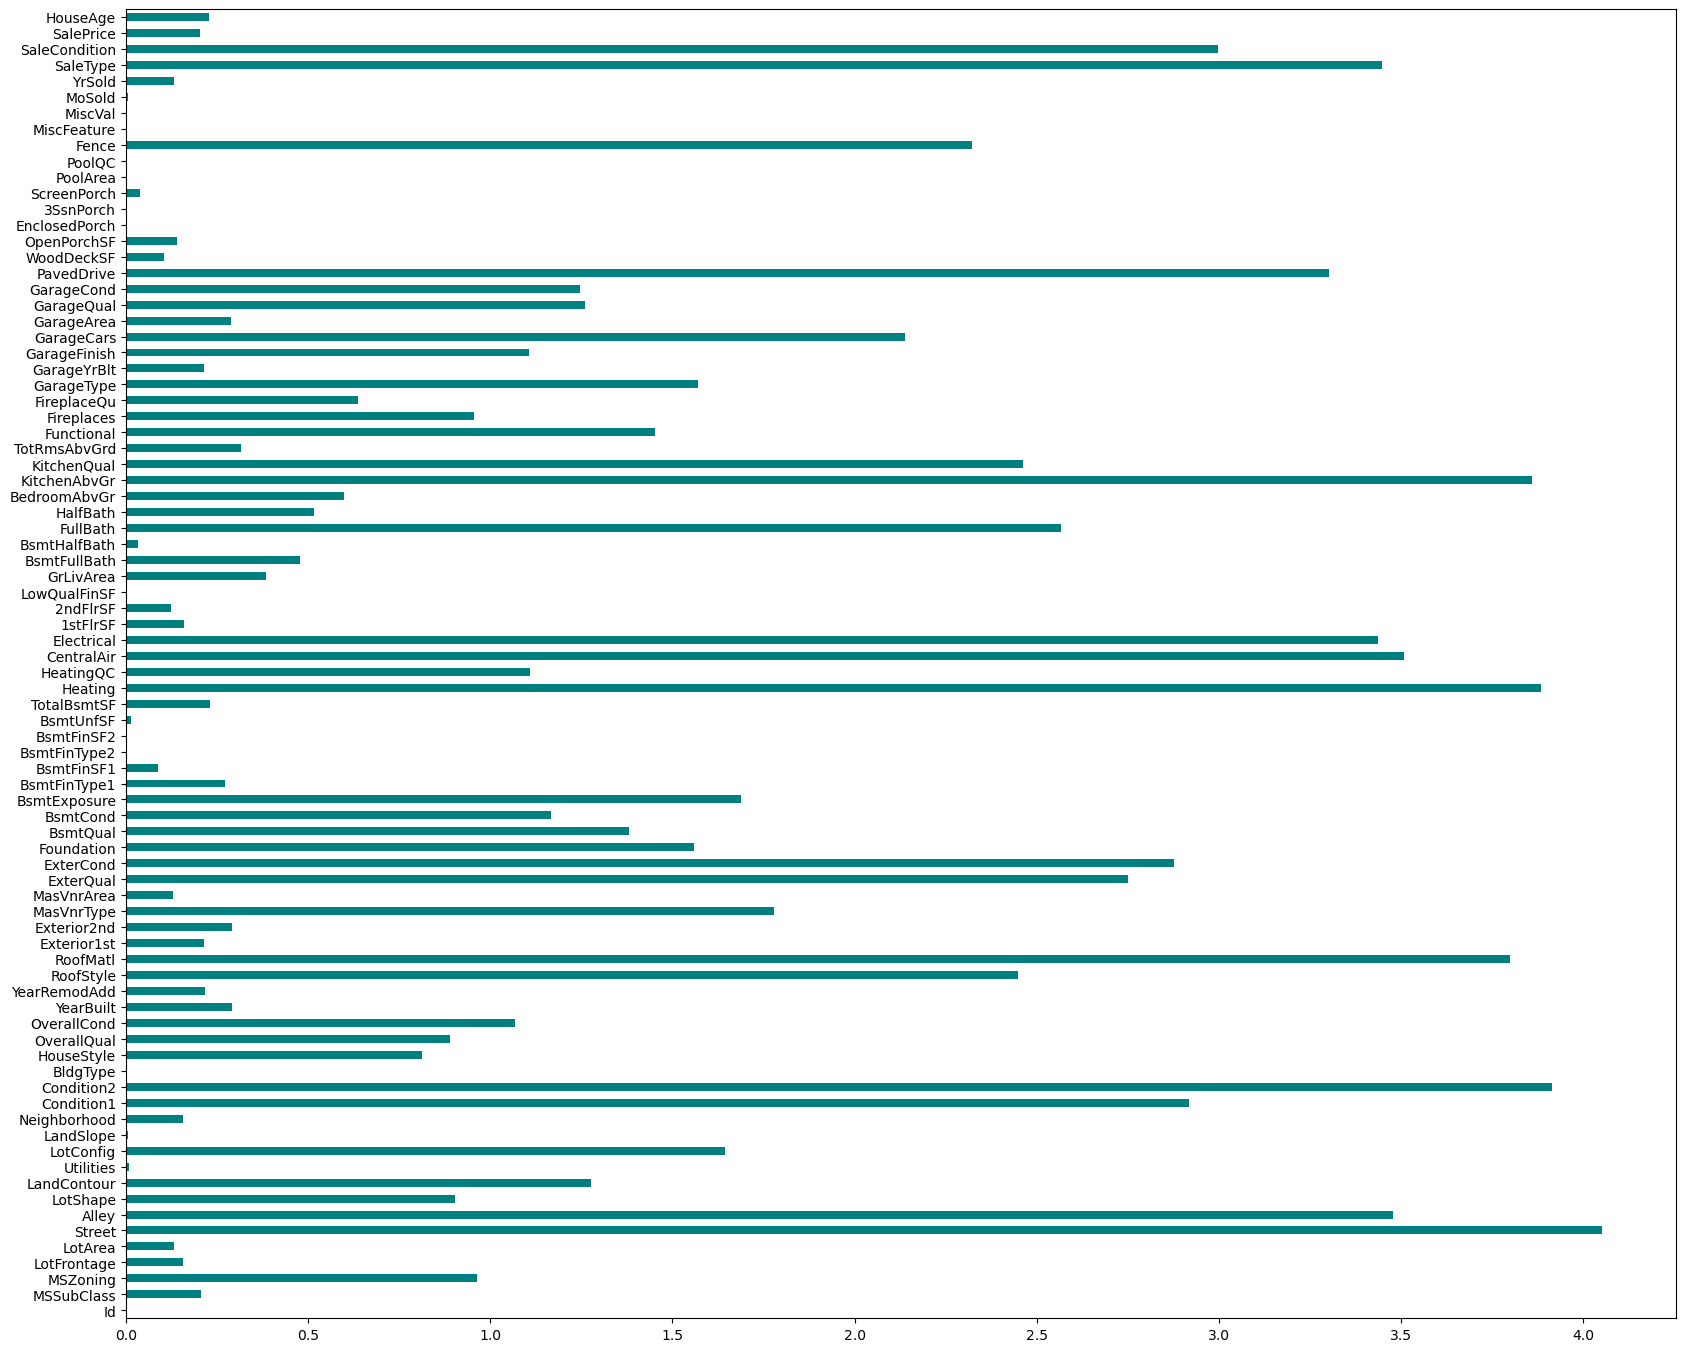

In [24]:
from sklearn.feature_selection import mutual_info_classif

X = df_train.drop(['SalePrice'], axis=1) 
y = df_train['SalePrice']

plt.figure(figsize=(20,17))
importances = mutual_info_classif(X,y)
feat_imp = pd.Series(importances, df_train.columns[0:len(df_train.columns)-1])
feat_imp.plot(kind='barh',color='teal')
#plt.show()

In [25]:
sorted_features = sorted(feat_imp.items(), key=lambda x: x[1], reverse=True)

k = 50  # example: select top 45 features
features = []
for feature_name, info_gain_value in sorted_features[:k]:
    #print(f"{feature_name}: {info_gain_value}")
    features.append(feature_name)
    
print(features)
target = df_train['SalePrice']

['Street', 'Condition2', 'Heating', 'KitchenAbvGr', 'RoofMatl', 'CentralAir', 'Alley', 'SaleType', 'Electrical', 'PavedDrive', 'SaleCondition', 'Condition1', 'ExterCond', 'ExterQual', 'FullBath', 'KitchenQual', 'RoofStyle', 'Fence', 'GarageCars', 'MasVnrType', 'BsmtExposure', 'LotConfig', 'GarageType', 'Foundation', 'Functional', 'BsmtQual', 'LandContour', 'GarageQual', 'GarageCond', 'BsmtCond', 'HeatingQC', 'GarageFinish', 'OverallCond', 'MSZoning', 'Fireplaces', 'LotShape', 'OverallQual', 'HouseStyle', 'FireplaceQu', 'BedroomAbvGr', 'HalfBath', 'BsmtFullBath', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt', 'Exterior2nd', 'GarageArea', 'BsmtFinType1', 'TotalBsmtSF', 'HouseAge']


# Model Training

In [26]:
features_to_extract = features
subset_df = df_train.loc[:, features_to_extract] 

new_df = pd.DataFrame(data=subset_df, columns=features_to_extract)
new_df.head()

,Street,Condition2,Heating,KitchenAbvGr,RoofMatl,CentralAir,Alley,SaleType,Electrical,PavedDrive,...,HalfBath,BsmtFullBath,GrLivArea,TotRmsAbvGrd,YearBuilt,Exterior2nd,GarageArea,BsmtFinType1,TotalBsmtSF,HouseAge
0,1,2,1,1,1,1,2,8,4,2,...,1,1,1710,8,104,13,548,6,856,5
1,1,2,1,1,1,1,2,8,4,2,...,0,0,1262,6,77,8,460,5,1262,31
2,1,2,1,1,1,1,2,8,4,2,...,1,1,1786,6,102,13,608,6,920,6
3,1,2,1,1,1,1,2,8,4,2,...,0,1,1717,7,19,15,642,5,756,36
4,1,2,1,1,1,1,2,8,4,2,...,1,1,2198,9,101,13,836,6,1145,8


In [41]:
X = new_df
y = df_train['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# XG BOOST

In [39]:

!pip install xgboost


     -------------------------------------- 70.9/70.9 MB 758.4 kB/s eta 0:00:00


In [42]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb_predict = xgb.predict(X_test)

xgb_accuracy = xgb.score(X_test, y_test)
print(xgb_accuracy)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgb, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

0.9009917709331511
Mean MAE: 17878.726 (2117.937)


# RIDGE

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

print(model.alpha_)

ridge_train_accuracy = model.score(X_train, y_train)
ridge_test_accuracy = model.score(X_test, y_test)
print("Ridge train accuracy:",ridge_train_accuracy)
print("Ridge test accuracy:",ridge_test_accuracy)

Mean MAE: 21501.276 (1825.563)
10.0
Ridge train accuracy: 0.8229737407741143
Ridge test accuracy: 0.8422579291940792


# LASSO

In [44]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=1.0)
las.fit(X_train,y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(las, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

las_train_accuracy = model.score(X_train, y_train)
las_test_accuracy = las.score(X_test, y_test)
print("Lasso train accuracy:",las_train_accuracy)
print("Lasso test accuracy:",las_test_accuracy)

Mean MAE: 21601.242 (1823.944)
Lasso train accuracy: 0.8229737407741143
Lasso test accuracy: 0.8417505506717189
